# Prova II- Computação Centífica II
> Autor: Gil Miranda<br>
> Contato: gil.neto@ufrj.br; gilsmneto@gmail.com

## Set-up of dependencies and libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

##### Vectorized Runge Kutta 4th Order
### Input:  F -> Differential equation;
###         y0 -> list or scalar for initial condition;
###         ts -> list of points in time to evaluate the equation;
###         p -> list or scalar for parameters for F, default is set to 0 if F has no extra parameters;
### Output: ys -> numpy array with all solutions for each step t, ys is a Matrix
##### Gil Miranda - last revision 26/10/2019
def rk_4(F, ts, y0, p = 0):
    ys = [y0]
    t = ts[0]
    h = ts[1] - ts[0]
    for tnext in ts:
        k1 = h*F(t, ys[-1], p)
        k2 = h*F(t + h/2, ys[-1] + k1/2, p)
        k3 = h*F(t + h/2, ys[-1] + k2/2, p)
        k4 = h*F(t + h, ys[-1] + k3)
        ynext = ys[-1] + (k1/6+k2/3+k3/3+k4/6)
        ys.append(ynext)
        t = tnext
    return np.array(ys[:-1])

##### Secant method for fixed point
##### Gil Miranda - last revision 24/11/2019
def sec(f,x,y, prec=1e-8, tol=1e-8, maxiter=200):
    if maxiter == 0:
        return None
    dx = f(x)*(x-y)/(f(x)-f(y))
    newx = x - dx
    if abs(f(newx)-f(x))>tol:
        if abs(dx) < prec:
            return newx
        else:
            return sec(f,y,newx, prec=prec,maxiter=maxiter-1)
    else:
        return newx

##### Shooting method
##### Gil Miranda - last revision 24/11/2019    
def shooting(F, y0, s, ts, beta = 0, p = 1):
    def f(S):
        return rk_4(F, ts,  [y0[0],S], p)[-1][0]-beta
    return sec(f, y0[0], s)

### Definindo constantes e funções necessárias

In [2]:
N = 30
xs = np.linspace(-1,1,N)
eps = 1

def base(j, x):
    return np.sin(j*np.pi*x)

## A equação

$$
\epsilon \frac{\mathrm{d}^2u}{\mathrm{d}x^2} + 2(1-x^2)u + u^2 = 1
$$

$$
\frac{\mathrm{d}^2u}{\mathrm{d}x^2} = \frac{1 - 2(1-x^2)u - u^2}{\epsilon}
$$

Tomando $\frac{\mathrm{d}^2u}{\mathrm{d}x^2} = f(x)$, e uma solução como $u(x) \approx u_h(x) = \displaystyle\sum^N_{j = 1} c_j \varphi_j(x)$, podemos reescrever o problema em forma de um sistema
$$
A\vec{c} = \vec{f}
$$

Onde
$$
f_i = \int^1_{-1}f(x)\varphi_i \mathrm{d}x
$$
$$
A_{ij} = \int^1_{-1}\frac{\mathrm{d}\varphi_j}{\mathrm{d}x}\frac{\mathrm{d}\varphi_i}{\mathrm{d}x} \mathrm{d}x
$$
e $c_j$ podemos descobrir resolvendo o sistema, daí podemos utilizar a solução aproximada $u_h(x)$

### Calculando a matriz A

Vamos calcular primeiro os termos da matriz A, para isso resolvemos a integral acima, temos:
$$
\varphi_j = sen(j\pi x)\\
\frac{\mathrm{d}\varphi_j}{\mathrm{d}x} = j\pi cos(j \pi x)
$$
Então a integral a ser resolvida é:
$$
\int^1_{-1}(j\pi cos(j \pi x))(i\pi cos(i \pi x)) \mathrm{d}x
$$
E utilizando a identidade: $cos(a)cos(b) = \frac{1}{2}(cos(a+b)+cos(a-b))$, podemos resolver a integral
$$
\begin{align}
\int^1_{-1}\frac{\pi^2 ij}{2} cos(\pi x(j+i)) + cos(\pi x(j-i)) \mathrm{d}x &= \frac{\pi^2 ij}{2} \left(\int^1_{-1} cos(\pi x(j+i))\mathrm{d}x + \int^1_{-1}cos(\pi x(j-i)) \mathrm{d}x \right)\\
&= \frac{\pi^2 ij}{2} \left(\frac{sen(\pi x(j+i))}{\pi(i+j)} + \frac{sen(\pi x(j-i))}{\pi(j-i)}\right)\Big|_{-1}^{1}\\
&= \frac{\pi^2 ij}{2} \left(\frac{sen(\pi(j+i))}{\pi(i+j)} + \frac{sen(\pi(j-i))}{\pi(j-i)} - \frac{sen(-\pi(j+i))}{\pi(i+j)} - \frac{sen(-\pi(j-i))}{\pi(j-i)}\right)\\
&\text{Como $j, i$ são números inteiros, temos que sua soma também é, e como $sen(n\pi) = 0, n \in \mathbb{N}$}\\
&= 0
\end{align}
$$
Portanto a integral é $0$, mas temos uma restrição em $i,j$ por conta do termo $(j-i)$ sendo dividido não podemos ter $j = i$ nesta integral, logo só é válida para $i \neq j$, portanto
$$A_{ij} = 0, \, \forall i \neq j$$
Olhando para o caso $i = j$, temos:
$$
\int^1_{-1}(j\pi cos(j \pi x))(i\pi cos(i \pi x)) \mathrm{d}x = \int^1_{-1}j^2\pi^2 cos^2(j \pi x) \mathrm{d}x
$$
E usando a identidade $cos^2(x) =  \frac{1}{2}(1 + cos(2x)$
$$
\begin{align}
\int^1_{-1}j^2\pi^2 cos^2(j \pi x) \mathrm{d}x &= \int^1_{-1}\frac{j^2\pi^2}{2} (1 + cos(2j \pi x) ) \mathrm{d}x\\
&= \frac{j^2\pi^2}{2}\int^1_{-1} (1 + cos(2j \pi x) ) \mathrm{d}x\\
&= \frac{j^2\pi^2}{2}\left(\int^1_{-1} 1 \mathrm{d}x + \int^1_{-1} cos(2j \pi x) ) \mathrm{d}x\right)\\
&= \frac{j^2\pi^2}{2}\left(x\Big|_{-1}^{1} + \frac{sen(2j \pi x)}{2\pi j}\Big|_{-1}^{1}\right)\\
&= j^2\pi^2
\end{align}
$$
Logo, para os elementos de $A$ com $i = j$, temos $A_{ij} = j^2 \pi^2$

In [3]:
## Definindo as funções que darão os valores das integrais

## i != j
def F1(j,i,x):
    a = (np.pi*i*j/2)
    b = np.sin(np.pi*x*(i+j))/(i+j)
    c = np.sin(np.pi*x*(j-i))/(j-i)
    return a*(b+c)

## i = j
def F2(j):
    return (j**2)*(np.pi**2)

In [4]:
A = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if i == j:
            A[i][j] = F2(i+1)
        else:
            A[i][j] = F1(j+1,i+1,1) - F1(j+1,i+1, -1)

### Calculando o vetor f
Como temos $f_i = \int^{1}_{-1} f(x)\varphi_i \mathrm{d}x$, mas:
$$
f(x) = \frac{1 - 2(1-x^2)u - u^2}{\epsilon}
$$
Que depende dos termos $u(x), u(x)^2$ ao qual não conhecemos\\
Precisamos de uma forma de calcular $f$ nos pontos do domínio para podermos encontrar o vetor $\vec{f}$, para isso vamos resolver a EDO pelo metódo de Shooting, assim teremos $f(x)$ nos pontos do grid e poderemos continuar a montar nossa solução $u_h(x)$

#### Econtrando numericamente $f(x)$

Transformando a EDO de segunda ordem em um sistema de edos de primeira ordem

$$
\begin{cases}
\frac{\mathrm{d}u_1}{\mathrm{d}x} &= u_2\\
\frac{\mathrm{d}u_2}{\mathrm{d}x} &= f(x)
\end{cases}\\
u_1(-1) = 0
$$

In [5]:
def F(x, u, p = 1):
    u1, u2 = u
    return np.array([u2, (1-2*(1-x**2)*u1-u1**2)/p])

Agora usamos o metódo de Shooting para transformar nosso problema de `Valor de Contorno` para um problema de `Valor inicial`, como agora temos um sistema de equações de primeira ordem, temos 2 equações mas apenas condição inicial de uma delas, com o `shooting` iremos encontrar o valor inicial da segunda 

In [6]:
eps = 1
iv = shooting(F, [0,0], 1, xs, 0, eps)
sol = rk_4(F, xs, [0,iv], eps)
print(f"u_2(-1) = {iv}")

u_2(-1) = 2.1163816519237817


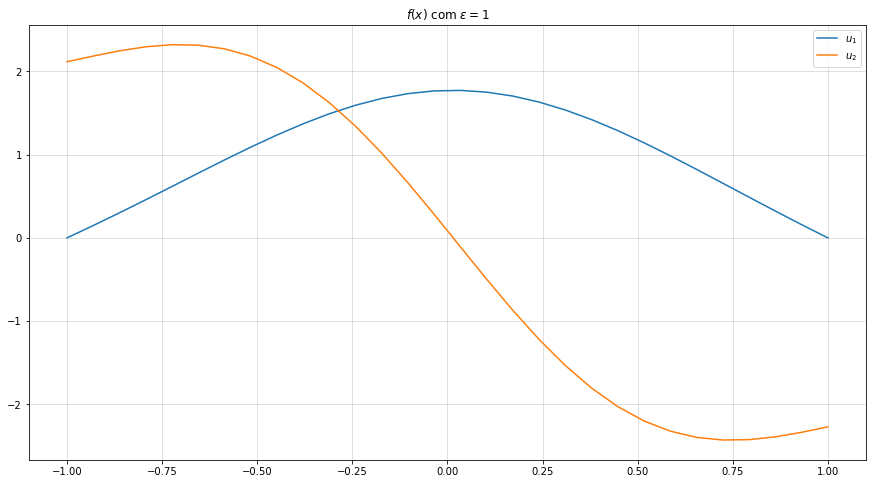

In [7]:
plt.figure(figsize=(15,8))
plt.plot(xs, sol[:,0], label = '$u_1$')
plt.plot(xs, sol[:,1], label = '$u_2$')
plt.title(f"$f(x)$ com $\epsilon = {eps}$")
plt.grid(alpha = 0.5)
plt.legend()
plt.show()

Agora temos os valores $f(x) = \frac{\mathrm{d}^2u}{\mathrm{d}x^2}$ no grid $x$, podemos construir o vetor $\vec{f}: f_i = \int^1_{-1}f(x)\varphi_i \mathrm{d}x$, para isso vamos fazer a integração numericamente utilizando o metódo do `Trapézio`

In [8]:
f_i = np.zeros(N)
for i in range(N):
    c = sol[:,0] * base(i,xs)
    f_i[i] = scipy.integrate.trapz(c, xs)

In [9]:
f_i

array([ 0.00000000e+00,  2.59789792e-02,  6.74353445e-04, -2.11479730e-05,
        8.19749178e-06, -4.63000328e-06,  3.24788935e-06, -2.47248972e-06,
        1.93898781e-06, -1.52681555e-06,  1.18469602e-06, -8.86285058e-07,
        6.15925792e-07, -3.63120681e-07,  1.20006068e-07,  1.20006068e-07,
       -3.63120679e-07,  6.15925794e-07, -8.86285057e-07,  1.18469602e-06,
       -1.52681555e-06,  1.93898781e-06, -2.47248972e-06,  3.24788935e-06,
       -4.63000328e-06,  8.19749178e-06, -2.11479730e-05,  6.74353445e-04,
        2.59789792e-02,  1.02305454e-15])

### Encontrando o vetor $\vec{c}$
Do fato de que
$$
A \vec{c} = \vec{f}
$$
podemos tirar $\vec{c}$ resolvendo o sistema

In [10]:
c_i = np.linalg.solve(A,f_i)

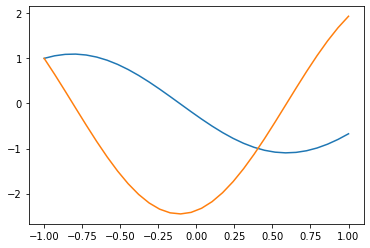

In [11]:
def F_F(x, u, p = 1):
    u1, u2 = u
    return np.array([u2, -5*u1])

j = rk_4(F_F, xs, [1,1])
plt.plot(xs, j)

### Resolvendo a Equação do Problema com Elementos Finitos
Usando o fato de que:  $u(x) \approx u_h(x) = \displaystyle\sum^N_{j = 1} c_j \varphi_j(x)$, temos agora todos os elementos para criar nossa função que aproxima a solução da equação diferencial

In [12]:
def u_h(cs):
    def f(x):
        soma = 0
        for i in range(len(cs)):
            partial = cs[i]*base(i,x)
        soma += partial
        return soma
    return f

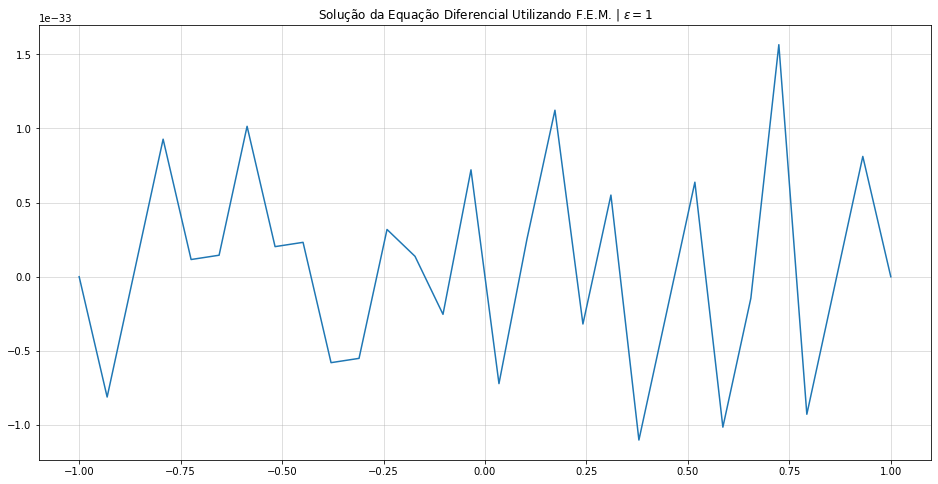

In [13]:
plt.figure(figsize=(16,8))
plt.plot(xs, u_h(c_i)(xs))
plt.grid(alpha = 0.5)
plt.title('Solução da Equação Diferencial Utilizando F.E.M. | $\epsilon = 1$')
plt.show()